In [43]:
import os
import re
import csv

def parse_log_file(log_file_path):
    # Define patterns to search for the required metrics
    best_loss_pattern = r"best loss: ([\d.]+)"
    inflow_mae_pattern = r"INFLOW, MAE: ([\d.]+),"
    outflow_mae_pattern = r"OUTFLOW, MAE: ([\d.]+),"
    inflow_mape_pattern = r"INFLOW, MAE: [\d.]+, MAPE: ([\d.]+)%"
    outflow_mape_pattern = r"OUTFLOW, MAE: [\d.]+, MAPE: ([\d.]+)%"

    # Initialize variables to store the extracted values
    metrics = {'Best Loss': None, 'INFLOW MAE': None, 'OUTFLOW MAE': None, 'INFLOW MAPE': None, 'OUTFLOW MAPE': None}

    with open(log_file_path, 'r') as file:
        log_data = file.read()
        # Search and extract metrics from log data
        metrics['Best Loss'] = re.search(best_loss_pattern, log_data).group(1) if re.search(best_loss_pattern, log_data) else None
        metrics['INFLOW MAE'] = re.search(inflow_mae_pattern, log_data).group(1) if re.search(inflow_mae_pattern, log_data) else None
        metrics['OUTFLOW MAE'] = re.search(outflow_mae_pattern, log_data).group(1) if re.search(outflow_mae_pattern, log_data) else None
        metrics['INFLOW MAPE'] = re.search(inflow_mape_pattern, log_data).group(1) if re.search(inflow_mape_pattern, log_data) else None
        metrics['OUTFLOW MAPE'] = re.search(outflow_mape_pattern, log_data).group(1) if re.search(outflow_mape_pattern, log_data) else None

    return metrics

def process_dataset_directory(dataset_directory, output_csv_file):
    # Prepare the CSV file
    with open(output_csv_file, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Experiment Name', 'Best Loss', 'INFLOW MAE', 'OUTFLOW MAE', 'INFLOW MAPE', 'OUTFLOW MAPE'])

        # Walk through the dataset directory
        for root, dirs, files in os.walk(dataset_directory):
            for name in files:
                if name.endswith(".log"):
                    log_file_path = os.path.join(root, name)
                    print(log_file_path)
                    print(os.path.basename(os.path.dirname(os.path.dirname(log_file_path))) + "_" + os.path.basename(os.path.dirname(log_file_path))[-5:])
                    # experiment_name = os.path.basename(os.path.dirname(os.path.dirname(log_file_path)))  # Get the experiment name from the path
                    experiment_name = os.path.basename(os.path.dirname(os.path.dirname(log_file_path))) + "_" + os.path.basename(os.path.dirname(log_file_path))[:]  # Get the experiment name from the path
                    metrics = parse_log_file(log_file_path)
                    writer.writerow([log_file_path] + list(metrics.values()))

# Example usage
dataset = "NYCTaxi"
dataset_directory = fr"D:\omer\onlineJEPATrain\experiments\{dataset}" # Adjust this path to your dataset directory
output_csv_file = fr"D:\omer\onlineJEPATrain\experiments\{dataset}\metrics_{dataset}.csv"
process_dataset_directory(dataset_directory, output_csv_file)


D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240624-154354\noComment\run.log
20240624-154354_mment
D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240626-162504\noComment\run.log
20240626-162504_mment
D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240626-163605\noComment\run.log
20240626-163605_mment
D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240626-163714\noComment\run.log
20240626-163714_mment
D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240626-163947\noComment\run.log
20240626-163947_mment
D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240626-165331\noComment\run.log
20240626-165331_mment
D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240626-165517\noComment\run.log
20240626-165517_mment
D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240626-165619\noComment\run.log
20240626-165619_mment
D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240626-171339\noComment\run.log
20240

w.shape: (94, 8)


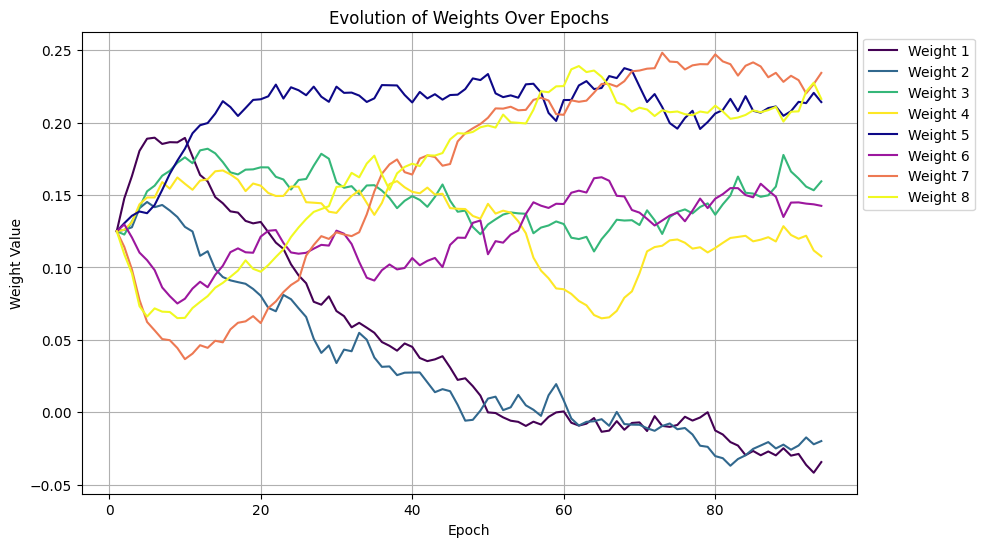

[[ 1.25000000e-01  1.25000000e-01  1.25000000e-01  1.25000000e-01
   1.25000000e-01  1.25000000e-01  1.25000000e-01  1.25000000e-01]
 [ 1.47769645e-01  1.25934660e-01  1.22699589e-01  1.26025856e-01
   1.30561560e-01  1.29693717e-01  1.14135191e-01  1.09028861e-01]
 [ 1.63047582e-01  1.27738088e-01  1.31770089e-01  1.31193370e-01
   1.35662749e-01  1.20743386e-01  9.86554101e-02  9.59753767e-02]
 [ 1.80515930e-01  1.40918434e-01  1.41368419e-01  1.43609166e-01
   1.38634577e-01  1.10253729e-01  7.76150301e-02  7.32568428e-02]
 [ 1.88923538e-01  1.45205811e-01  1.52585208e-01  1.48328140e-01
   1.37460873e-01  1.05029330e-01  6.23562969e-02  6.60756379e-02]
 [ 1.89625621e-01  1.41610414e-01  1.56473666e-01  1.48335576e-01
   1.43122524e-01  9.81662422e-02  5.65139204e-02  7.17155710e-02]
 [ 1.85300544e-01  1.43142939e-01  1.63331792e-01  1.58949554e-01
   1.53562129e-01  8.61569047e-02  5.05190939e-02  6.94552064e-02]
 [ 1.86525002e-01  1.39323831e-01  1.66738823e-01  1.54397950e-01
   

In [42]:
import matplotlib.pyplot as plt
import numpy as np
# Function to load weights
def load_weights(epoch, directory="weight_data"):
    filename = os.path.join(directory, f"weights_epoch_{epoch}.npy")
    return np.load(filename)

# Example: Load and plot weights from epoch 20
# weights_epoch_20 = load_weights(20)
# filename = r"D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240701-120042\checking if backprop reaches unused weights due to softmax\learnable_weights_epoch_5.png.npy"
filename = r"D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=1\20240701-203202\fixed encoder, learning weights, only view1\learnable_weights_epoch_93.png.npy"
filename = r"D:\omer\onlineJEPATrain\experiments\NYCTaxi\pred__seed=4\20240701-235700\fixed encoder, learning weights, only view1, with softmax, with 8_neighbours\learnable_weights_epoch_94.png.npy"
w=np.load(filename)
print(f"w.shape: {w.shape}")
import numpy as np
import matplotlib.pyplot as plt


epochs = np.arange(1, int(filename.split(".")[-3][-2:])+1)  # Since you have 4 epochs, from 1 to 4
import matplotlib.cm as cm
colors_1 = cm.viridis(np.linspace(0, 1, w.shape[1] // 2))
colors_2 = cm.plasma(np.linspace(0, 1, w.shape[1] - w.shape[1] // 2))

plt.figure(figsize=(10, 6))

# Plot the first half of the weights with the first colormap
for i in range(w.shape[1] // 2):
    plt.plot(epochs, w[:, i], label=f'Weight {i+1}', color=colors_1[i])

# Plot the second half of the weights with the second colormap
for i in range(w.shape[1] // 2, w.shape[1]):
    plt.plot(epochs, w[:, i], label=f'Weight {i+1}', color=colors_2[i - w.shape[1] // 2])

plt.xlabel('Epoch')
plt.ylabel('Weight Value')
plt.title('Evolution of Weights Over Epochs')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))  # Moving legend outside the plot
plt.grid(True)
plt.show()
print(w)

In [34]:
import torch

my_list = list(range(17))
my_tensor = torch.tensor(my_list)
print(my_tensor)
print(my_tensor.shape)
my_tensor = my_tensor[-4:]
print(my_tensor)
print(my_tensor.shape)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])
torch.Size([17])
tensor([13, 14, 15, 16])
torch.Size([4])
